# 송파구 올림픽공원 3번 출구 스테이션 예측 분석
### 서울시 각 대여소별로 시간대별 자전거 배치를 최적화하는 데이터 기반 웹 서비스 개발.
> [서울 열린데이터 광장](https://data.seoul.go.kr/) 이용
- [서울시 공공자전거 대여소 정보](https://data.seoul.go.kr/dataList/OA-13252/F/1/datasetView.do)
- [서울시 공공자전거 이용정보(일별)](https://data.seoul.go.kr/dataList/OA-15246/F/1/datasetView.do)
- [서울 날씨 데이터](https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36)

## 올림픽 공원 따릉이 거치대수 추출
[서울시 공공자전거 대여소 정보](https://data.seoul.go.kr/dataList/OA-13252/F/1/datasetView.do)

> 초기 설정

In [223]:
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform
import matplotlib.pyplot as plt

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

> 데이터 불러오기

In [224]:
import pandas as pd 
public_bike_stations = pd.read_csv('../../data/공공자전거 대여소 정보.csv')
public_bike_stations

,대여소\n번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치\n시기,거치대수(LCD),거치대수(QR),운영\n방식
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451,2015-10-07,20.0,20.0,QR
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.575947,126.974060,2015-10-07,12.0,12.0,QR
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.571770,126.974663,2015-10-07,8.0,8.0,QR
3,305,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.572559,126.978333,2015-01-07,16.0,16.0,QR
4,307,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.570000,126.971100,2015-10-07,11.0,11.0,QR
...,...,...,...,...,...,...,...,...,...,...
2758,5872,서경팰리스 앞,영등포구,영등포구 가마산로 468,37.505764,126.908661,2024-03-18,NaN,7.0,QR
2759,6057,을지로5가(방산시장),중구,중구 동호로 369,37.567398,127.002014,2024-04-11,NaN,6.0,QR
2760,6058,서울도시건축전시관 옆,중구,중구 세종대로 101,37.566540,126.976845,2024-04-26,NaN,10.0,QR
2761,6059,덕수중학교,중구,중구 인현동2가 240-2,37.564392,126.997299,2024-06-03,NaN,8.0,QR


> 올림픽공원 3번 출구 대여소 추출

In [225]:
stations = public_bike_stations['보관소(대여소)명']
for station in stations:
    print(station)

경복궁역 7번출구 앞
경복궁역 4번출구 뒤
광화문역 1번출구 앞
 종로구청 옆
 서울역사박물관 앞
 광화문 S타워 앞
광화문역 6번출구 옆 B
 국립현대미술관
종각역 1번출구 앞
안국역 5번출구 앞
 낙원상가 옆
 탑골공원 앞
청계2가 사거리 옆
종로3가역 2번출구 뒤
종로3가역 15번출구 앞
 창경궁 입구
세운스퀘어 앞
종로4가 사거리
 혜화동 로터리
혜화역 3번출구 뒤
 대학로 마로니에공원
힐스테이트창경궁 아파트 앞
 성균관대 E하우스 앞
 서울보증보험본사 앞
 독립문역 사거리
어린이도서관
 청운초교 앞 삼거리
 중앙고입구 삼거리
 재동초교 앞 삼거리
 포르투갈 대사관 앞
서울사대부설초등학교 앞
 KT혜화지사 앞
성균관대입구 사거리 A
 원남동사거리
동묘앞역 1번출구 뒤
청계8가 사거리 A
신설동역 11번출구 뒤
창신역 1번출구 앞
독립문역 3-1번출구
 SK 서린빌딩 앞
종각역 5번출구
 동성중학교 앞
동대문역 8번 출구
경희궁 자이 3단지
경희궁 자이 2단지
 종묘공영주차장 건너편
 상명대입구
 신영동삼거리
 일성아파트
 효자동 삼거리
 청와대앞길
 동대문 종합시장 버스정류장
종로오가 지하쇼핑센터 14번출구
종로2가 버스정류장 (종각방향)
종로6가역 버스정류장(동대문 방향)
숭인2동 주민센터 입구
 종로꽃시장 입구 옆
광화문역 5번출구
 서울지방경찰청
 신영동삼거리(북악터널방향)
 삼청동 골목
 삼청공원 앞
 평창동주민센터 앞
창신두산아파트
이화공영주차장
서울특별시 중부교육지원청
파크팰리스
안국동사거리(신)
종로타워빌딩
종로3가역 8번출구
종묘
세운상가
종로플레이스
종로5가역 4번출구
동대문역6번출구
동묘앞역 6번출구
창신3동주민센터
창신역2번 출구
국립어린이과학관
 성균관대입구 사거리 B
혜화역 1번출구
성균관대 정문
현대그룹(본사)
광화문 풍림스페이스본 1단지앞
독립문역 2번출구 뒤
인왕산 아이파크 정문
서울미술관
HW컨벤션센터 앞
구기치안센터 앞
로제우스 레포츠센터
종로2가 사거리
쌍용아파트2단지 정문
청계3가 사거리
 조계사앞사거리
 자교교회 앞

> 역 이름이 '올림픽공원역 3번출구' 것을 확인.

In [226]:
olympic_station = public_bike_stations[public_bike_stations['보관소(대여소)명'] == '올림픽공원역 3번출구']
olympic_station

,대여소\n번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치\n시기,거치대수(LCD),거치대수(QR),운영\n방식
2501,2622,올림픽공원역 3번출구,송파구,송파구 방이동 89-28,37.516258,127.130592,2018-11-14,20.0,NaN,LCD


> 거치대수는 LCD이므로 거치대수 컬럼을 합쳐주고 정리.

In [227]:
# 거치대수 컬럼 생성
olympic_station['거치대수(LCD)'] = olympic_station['거치대수(LCD)'].fillna(0)
olympic_station['거치대수(QR)'] = olympic_station['거치대수(QR)'].fillna(0)
olympic_station['거치대수'] = olympic_station[['거치대수(LCD)', '거치대수(QR)']].sum(axis=1)

# 거치대수(LCD), 거치대수(QR) 컬럼 삭제
olympic_station.drop(columns=['거치대수(LCD)','거치대수(QR)','운영\n방식','설치\n시기'], inplace= True)

# 컬럼 이름 정리
olympic_station.rename(columns={'대여소\n번호':'대여소 번호', '보관소(대여소)명':'대여소'}, inplace=True)

# 거치대수는 소수점 아래 숫자가 나올 일이 없기에 Int type으로 변환
olympic_station['거치대수'] = olympic_station['거치대수'].astype('int')

# 데이터 확인
olympic_station

,대여소 번호,대여소,자치구,상세주소,위도,경도,거치대수
2501,2622,올림픽공원역 3번출구,송파구,송파구 방이동 89-28,37.516258,127.130592,20


## 올림픽공원역 3번출구 시각화

In [228]:
import folium
import folium.map

# 송파구 중심 위치 설정
center_lat = olympic_station['위도']
center_lon = olympic_station['경도']

# 지도 생성
sp_map = folium.Map(location=[center_lat, center_lon], zoom_start=16)

# 데이터프레임의 각 대여소 정보를 지도에 추가
folium.Marker(
    location=[olympic_station['위도'], olympic_station['경도']],  # 위도와 경도를 지정
    popup=f"{olympic_station['대여소']}거치대수: {olympic_station['거치대수']}",  # 팝업으로 대여소 이름과 거치대수 표시
    tooltip=olympic_station['대여소'],  # 마우스 오버 시 표시할 텍스트
).add_to(sp_map)

sp_map

> 올림픽 공원 주변에는 자전거 도로가 많아 따릉이 수요에 영향을 끼칠 것으로 보임.    
  또한 주말이나 휴일에 올림픽공원의 이용자가 많아 질 수 있으므로 따릉이와 상관관계 분석이 필요해 보임.

In [229]:
# 데이터 저장

olympic_station.to_csv("../../data/올림픽공원역 3번출구 거치대수.csv")

> 추출한 올림픽공원역 3번출구 거치대수 데이터 저장

---

## 올림픽공원역 일별 대여, 반납 공공데이터
- [서울시 공공자전거 이용정보(시간대별)](https://data.seoul.go.kr/dataList/OA-15245/F/1/datasetView.do)

In [230]:
import pandas as pd

# 데이터 불러오기
olympic_time_data = pd.read_csv("../../data/송파구 대여_반납 정보.csv")

# 데이터 확인
olympic_time_data.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID,자전거구분,자치구,반납 자치구
0,SPB-62435,2024-04-01 00:02:22,2637,아시아지하보도 14번 출구,0,2024-04-01 00:02:35,2637.0,아시아지하보도 14번 출구,0,0,0.00,1974,\N,내국인,ST-1864,ST-1864,일반자전거,송파구,송파구
1,SPB-58734,2024-04-01 00:03:25,1295,잠실역 8번출구,0,2024-04-01 00:05:04,4486.0,홈플러스 잠실점,0,1,0.00,2004,M,내국인,ST-1584,ST-2596,일반자전거,송파구,송파구
2,SPB-43679,2024-04-01 00:01:12,4880,송파청소년센터,0,2024-04-01 00:05:08,4893.0,문정법조단지12,0,3,471.33,1997,M,내국인,ST-2957,ST-2972,일반자전거,송파구,송파구
3,SPB-31592,2024-04-01 00:05:20,2621,한성백제역 2번 출구,0,2024-04-01 00:05:30,2621.0,한성백제역 2번 출구,0,0,0.10,2003,M,내국인,ST-1719,ST-1719,일반자전거,송파구,송파구
4,SPB-69307,2024-04-01 00:00:53,4465,건영아파트앞 사거리,0,2024-04-01 00:09:05,4490.0,송파파인타운 10단지 1005동,0,8,1062.41,2000,NaN,내국인,ST-2581,ST-2598,일반자전거,송파구,송파구


In [231]:
# 데이터 정보 확인
olympic_time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5199804 entries, 0 to 5199803
Data columns (total 19 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     int64  
 5   반납일시      object 
 6   반납대여소번호   float64
 7   반납대여소명    object 
 8   반납거치대     object 
 9   이용시간(분)   int64  
 10  이용거리(M)   float64
 11  생년        object 
 12  성별        object 
 13  이용자종류     object 
 14  대여대여소ID   object 
 15  반납대여소ID   object 
 16  자전거구분     object 
 17  자치구       object 
 18  반납 자치구    object 
dtypes: float64(2), int64(3), object(14)
memory usage: 753.8+ MB


In [232]:
# 대여일시, 반납일시 datetime type으로 변경
olympic_time_data['대여일시'] = pd.to_datetime(olympic_time_data['대여일시'])
olympic_time_data['반납일시'] = pd.to_datetime(olympic_time_data['반납일시'])

### 올림픽공원역 3번출구 데이터 분리
#### 분리하는 이유?              
1. 올림픽공원역 3번출구 이용 패턴 분석      
    - 대여와 반납 데이터가 혼합되어 있을 경우 특정 대여소의 정확한 이용 패턴을 분석하기 어려움.     
    - 올림픽공원 3번출구를 중심으로 데이터를 분리하여 시간대별 대여와 반납 양상 명확히 분석     
2. 대여소별 수요 예측           
    - 대여소에서 발생하는 대여 및 반납 수요를 개별적으로 분석해야 시간대별 자전거 수급을 최적화 할 수 있음.     
    - 이를 통해 특정 시간대에 자전거 부족 또는 초과 여부를 예측할 수 있습니다.      
3. 지역 맞춤형 서비스 제공                      
    - 올림픽공원역 3번출구는 특정한 특성을 지닌 대여소일 가능성이 있음.(공원 주변, 유동 인구 많음)          
    - 데이터를 분리하여 대여소에 맞는 서비스 개선 방안 제시.        
4. 모델 정확도 향상         
    - 머신러닝에서 사용되는 입력 데이터는 분리될 수록 정확도가 높아짐.      
5. 데이터 시각화 및 이해도 향상         
    - 올림픽공원역 3번출구에 집중된 데이터를 그래프로 시각화하면, 스테이션의 이용흐름을 직관적으로 파악할 수 있음.      

**이를 통해 분석 결과를 더 효과적으로 전달가능**

### 이동 경로 분석에 대하여 
- 이동경로(출발지-도착지)는 이동 패턴 분석이 필요할 때 중요함.
- 대부분의 대여 시스템에서는 이동 경로보다는 개별 대여소의 수요 예측과 균형 유지가 더 중요한 문제           

**서울시를 대상으로 웹을 개발할 목적이라 스테이션에 자전거 대여수가 중요함.**

> 올림픽공원역 3번출구 데이터 추출

In [233]:
# 대여소명이 올림픽 공원역 3번출구인 데이터

rent_data = olympic_time_data[olympic_time_data['대여 대여소명'] == '올림픽공원역 3번출구']

In [234]:
# 반납 대여소명이 올림픽 공원역 3번출구인 데이터 
return_data = olympic_time_data[olympic_time_data['반납대여소명'] == '올림픽공원역 3번출구']

In [235]:
rent_data

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID,자전거구분,자치구,반납 자치구
234,SPB-59537,2024-04-01 01:14:06,2622,올림픽공원역 3번출구,0,2024-04-01 01:38:21,2642.0,마천동 성내천 쉼터,0,24,3153.55,2004,M,내국인,ST-1720,ST-1794,일반자전거,송파구,송파구
305,SPB-60634,2024-04-01 02:08:39,2622,올림픽공원역 3번출구,0,2024-04-01 02:13:38,1050.0,둔촌역 3번 출입구,0,4,2210.00,2004,M,내국인,ST-1720,ST-1420,일반자전거,송파구,강동구
393,SPB-63175,2024-04-01 03:33:25,2622,올림픽공원역 3번출구,0,2024-04-01 03:50:16,1022.0,길동 사거리(초소앞),0,16,2585.92,1980,M,내국인,ST-1720,ST-505,일반자전거,송파구,강동구
729,SPB-33302,2024-04-01 06:25:35,2622,올림픽공원역 3번출구,0,2024-04-01 06:34:14,1084.0,윤선생빌딩(JYP사옥),0,8,1272.52,1974,M,내국인,ST-1720,ST-1687,일반자전거,송파구,강동구
748,SPB-50847,2024-04-01 06:11:14,2622,올림픽공원역 3번출구,0,2024-04-01 06:37:02,5764.0,한국체육대학교,0,25,4624.28,1987,\N,내국인,ST-1720,ST-3151,일반자전거,송파구,송파구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5199213,SPB-34062,2023-09-30 23:12:08,2622,올림픽공원역 3번출구,0,2023-09-30 23:16:58,1078.0,둔촌사거리,0,4,802.94,2001,M,내국인,ST-1720,ST-1839,일반자전거,송파구,강동구
5199285,SPB-64463,2023-09-30 23:15:37,2622,올림픽공원역 3번출구,0,2023-09-30 23:23:18,1218.0,방이역 4번출구,0,7,890.00,1998,\N,내국인,ST-1720,ST-892,일반자전거,송파구,송파구
5199354,SPB-31837,2023-09-30 23:24:31,2622,올림픽공원역 3번출구,0,2023-09-30 23:30:58,1218.0,방이역 4번출구,0,6,820.95,\N,F,내국인,ST-1720,ST-892,일반자전거,송파구,송파구
5199411,SPB-82966,2023-09-30 22:52:38,2622,올림픽공원역 3번출구,99,2023-09-30 23:36:05,3681.0,길동 마루빌딩,99,43,3140.00,1977,F,내국인,ST-1720,ST-2749,새싹자전거,송파구,강동구


> 대여대수 및 반납대수 계산

In [236]:
# 대여소명 기준으로 대여대수 집계
rent_count = rent_data.groupby(['대여 대여소명', rent_data['대여일시'].dt.date.rename('날짜'), rent_data['대여일시'].dt.hour.rename('시간대')]).size().reset_index(name='대여대수')

# 반납소명 기준으로 반납대수 집계
return_count = return_data.groupby(['반납대여소명', return_data['반납일시'].dt.date.rename('날짜'), return_data['반납일시'].dt.hour.rename('시간대')]).size().reset_index(name='반납대수')

##### 시간대별 데이터 병합

In [237]:
# 대여대수와 반납대수를 날짜와 시간대를 기준으로 병합
merged_data = pd.merge(
    rent_count.rename(columns={'대여 대여소명': '대여소'}),
    return_count.rename(columns={'반납대여소명': '대여소'}),
    on=['대여소', '날짜', '시간대'],
    how='outer'
).fillna(0)  # NaN 값은 0으로 대체

# 병합된 데이터 확인
print(merged_data.head())

           대여소          날짜  시간대  대여대수  반납대수
0  올림픽공원역 3번출구  2023-05-01    1   1.0   1.0
1  올림픽공원역 3번출구  2023-05-01    3   2.0   1.0
2  올림픽공원역 3번출구  2023-05-01    5   0.0   2.0
3  올림픽공원역 3번출구  2023-05-01    6   5.0   5.0
4  올림픽공원역 3번출구  2023-05-01    7   3.0   9.0


In [238]:
# 정보 확인
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8135 entries, 0 to 8134
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소     8135 non-null   object 
 1   날짜      8135 non-null   object 
 2   시간대     8135 non-null   int32  
 3   대여대수    8135 non-null   float64
 4   반납대수    8135 non-null   float64
dtypes: float64(2), int32(1), object(2)
memory usage: 286.1+ KB


#### 휴일여부(평일,휴일), 연, 월, 일 추가

In [239]:
# 날짜 column을 datetime으로 변환
merged_data['날짜'] = pd.to_datetime(merged_data['날짜'])

# 연, 월, 일. 휴일여부 컬럼 추가
merged_data['연'] = merged_data['날짜'].dt.year
merged_data['월'] = merged_data['날짜'].dt.month
merged_data['일'] = merged_data['날짜'].dt.day
merged_data['휴일여부'] = merged_data['날짜'].dt.weekday.apply(lambda x: '휴일' if x >= 5 else '평일')

merged_data

,대여소,날짜,시간대,대여대수,반납대수,연,월,일,휴일여부
0,올림픽공원역 3번출구,2023-05-01,1,1.0,1.0,2023,5,1,평일
1,올림픽공원역 3번출구,2023-05-01,3,2.0,1.0,2023,5,1,평일
2,올림픽공원역 3번출구,2023-05-01,5,0.0,2.0,2023,5,1,평일
3,올림픽공원역 3번출구,2023-05-01,6,5.0,5.0,2023,5,1,평일
4,올림픽공원역 3번출구,2023-05-01,7,3.0,9.0,2023,5,1,평일
...,...,...,...,...,...,...,...,...,...
8130,올림픽공원역 3번출구,2024-05-31,19,45.0,31.0,2024,5,31,평일
8131,올림픽공원역 3번출구,2024-05-31,20,27.0,33.0,2024,5,31,평일
8132,올림픽공원역 3번출구,2024-05-31,21,32.0,17.0,2024,5,31,평일
8133,올림픽공원역 3번출구,2024-05-31,22,12.0,12.0,2024,5,31,평일


#### 계절 컬럼 추가

In [240]:
# 계절 함수 
def get_seasons(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    elif month in [12, 1, 2]:
        return '겨울'

# 계절 컬럼 추가
merged_data['계절'] = merged_data['월'].apply(get_seasons)

# 데이터 확인
merged_data

,대여소,날짜,시간대,대여대수,반납대수,연,월,일,휴일여부,계절
0,올림픽공원역 3번출구,2023-05-01,1,1.0,1.0,2023,5,1,평일,봄
1,올림픽공원역 3번출구,2023-05-01,3,2.0,1.0,2023,5,1,평일,봄
2,올림픽공원역 3번출구,2023-05-01,5,0.0,2.0,2023,5,1,평일,봄
3,올림픽공원역 3번출구,2023-05-01,6,5.0,5.0,2023,5,1,평일,봄
4,올림픽공원역 3번출구,2023-05-01,7,3.0,9.0,2023,5,1,평일,봄
...,...,...,...,...,...,...,...,...,...,...
8130,올림픽공원역 3번출구,2024-05-31,19,45.0,31.0,2024,5,31,평일,봄
8131,올림픽공원역 3번출구,2024-05-31,20,27.0,33.0,2024,5,31,평일,봄
8132,올림픽공원역 3번출구,2024-05-31,21,32.0,17.0,2024,5,31,평일,봄
8133,올림픽공원역 3번출구,2024-05-31,22,12.0,12.0,2024,5,31,평일,봄


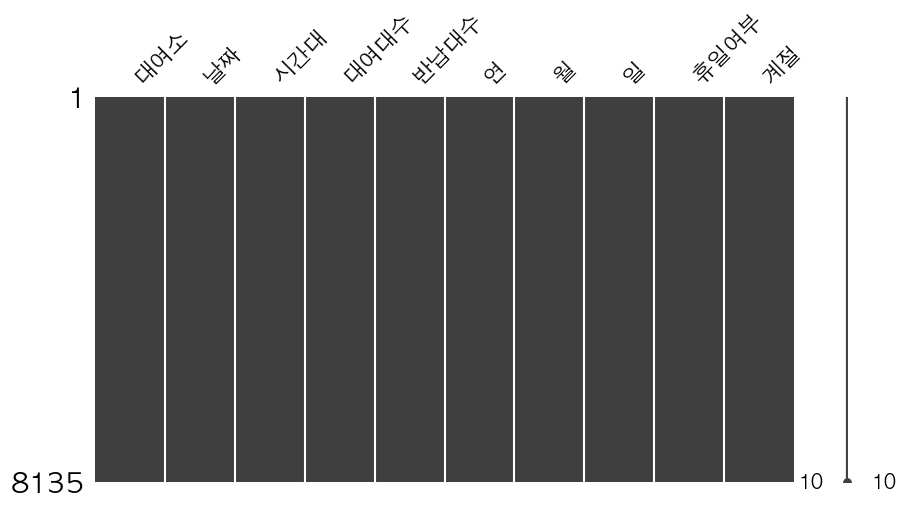

In [241]:
import missingno as msno

# 결측치 시각화
msno.matrix(merged_data, figsize=(10,5))
plt.show()

---

## EDA 중간 확인

### describe 및 분포 확인

In [242]:
# describe 
print(merged_data[['대여대수','반납대수']].describe())

              대여대수         반납대수
count  8135.000000  8135.000000
mean     10.773325    10.729809
std      11.293119    10.916148
min       0.000000     0.000000
25%       2.000000     3.000000
50%       7.000000     8.000000
75%      15.000000    15.000000
max      96.000000   109.000000


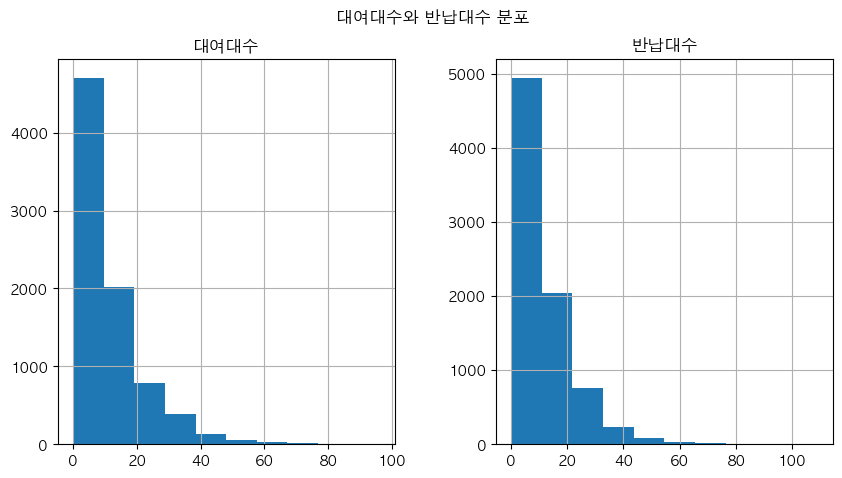

In [243]:
# hist 분포 확인
merged_data[['대여대수', '반납대수']].hist(figsize=(10,5))
plt.suptitle('대여대수와 반납대수 분포')
plt.show()

> 대여대수와 반납대수의 분포가 균형을 이루고 있는 것을 확인 할 수 있다.

### 상관계수 계산

In [244]:
# 상관계수 계산
correlation = merged_data['대여대수'].corr(merged_data['반납대수'])
print(f"대여대수와 반납대수의 상관계수: {correlation:.2f}")

대여대수와 반납대수의 상관계수: 0.92


### 대여 및 반납 패턴 분석

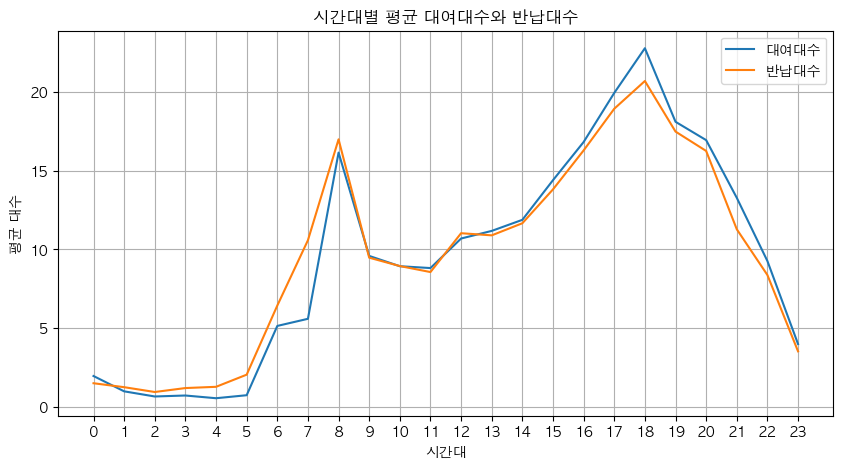

In [245]:
# 시간대별 평균 대여 대수와 반납 대수
time_group = merged_data.groupby('시간대')[['대여대수', '반납대수']].mean()

# 시각화
time_group.plot(kind='line', figsize=(10,5))
plt.title('시간대별 평균 대여대수와 반납대수')
plt.xlabel('시간대')
plt.ylabel('평균 대수')
plt.xticks(range(24))
plt.grid()
plt.show()

> 올림픽공원의 따릉이 대여소는 출/퇴근 시간인 8시와 18시에 평균 대수가 많이 확인되고 출근 시간 때는 대여대수 보다 반납대수의 평균 대수가 조금 높은 것을 알 수 있다.

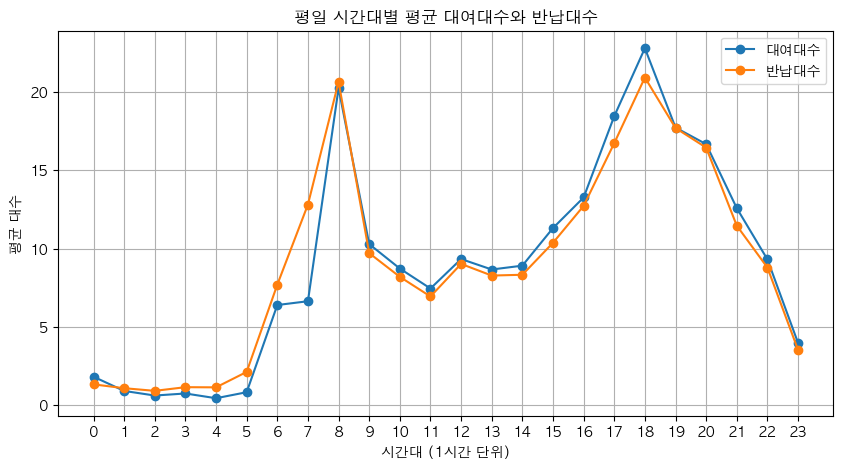

In [246]:
# '휴일여부'가 평일인 데이터만 필터링
holiday_data = merged_data[merged_data['휴일여부'] == '평일']

# 시간대별 평균 대여대수와 반납대수 계산
time_group = holiday_data.groupby('시간대')[['대여대수', '반납대수']].mean()

# 시각화
time_group.plot(kind='line', figsize=(10, 5), marker='o')
plt.title('평일 시간대별 평균 대여대수와 반납대수')
plt.xlabel('시간대 (1시간 단위)')
plt.ylabel('평균 대수')
plt.xticks(range(24))  # 0~23시로 설정
plt.grid()
plt.show()

> 평일은 역시 출 퇴근 시간대인 오전 8시와 오후 6시가 많은 것을 확인할 수가 있다.

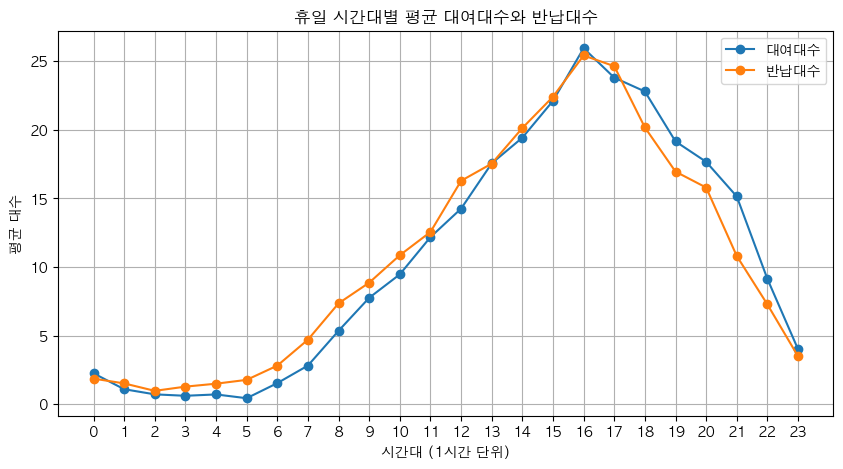

In [247]:
# '휴일여부'가 휴일인 데이터만 필터링
holiday_data = merged_data[merged_data['휴일여부'] == '휴일']

# 시간대별 평균 대여대수와 반납대수 계산
time_group = holiday_data.groupby('시간대')[['대여대수', '반납대수']].mean()

# 시각화
time_group.plot(kind='line', figsize=(10, 5), marker='o')
plt.title('휴일 시간대별 평균 대여대수와 반납대수')
plt.xlabel('시간대 (1시간 단위)')
plt.ylabel('평균 대수')
plt.xticks(range(24))  # 0~23시로 설정
plt.grid()
plt.show()

> 휴일 시간대별은 평일과 다르게 오후 4시에 가장 많은 이용객이 이용하는 것을 알 수 있다.

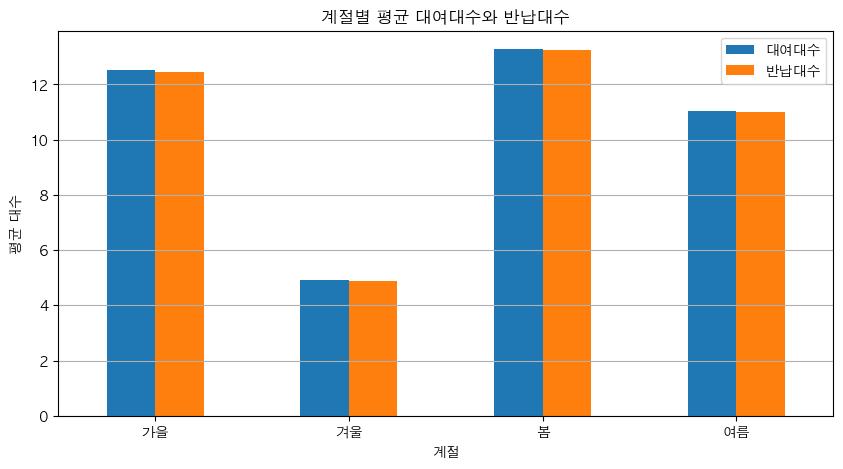

In [248]:
# 계절별 평균 대여대수와 반납대수
season_group = merged_data.groupby('계절')[['대여대수','반납대수']].mean()

# 시각화
season_group.plot(kind='bar', figsize=(10,5))
plt.title('계절별 평균 대여대수와 반납대수')
plt.xlabel('계절')
plt.ylabel('평균 대수')
plt.xticks(rotation = 0)
plt.grid(axis='y')
plt.show()

> 겨울은 평균 대수가 현저히 낮은 것을 확인 할수 있고 봄과 가을에 많은 사람들이 이용하는 것을 알 수 있다.

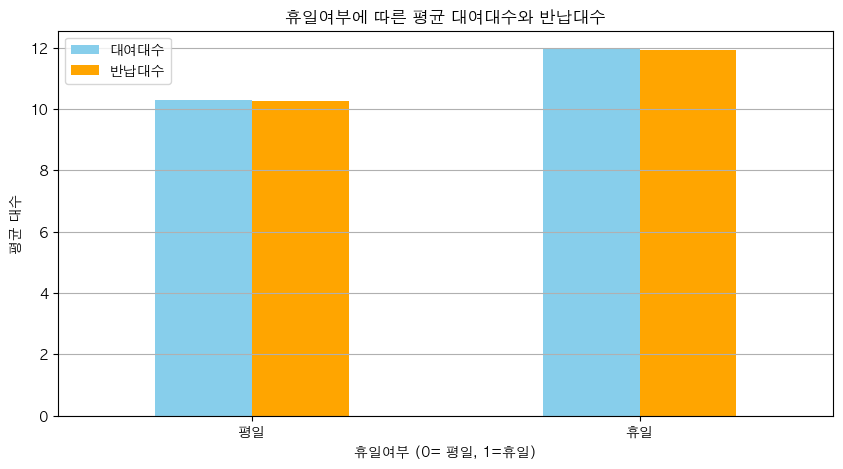

In [249]:
# 휴일여부별 평균 대여대수와 반납대수
holiday_group = merged_data.groupby('휴일여부')[['대여대수','반납대수']].mean()

# 시각화
holiday_group.plot(kind='bar', figsize=(10,5), color=['skyblue', 'orange'])
plt.title('휴일여부에 따른 평균 대여대수와 반납대수')
plt.xlabel('휴일여부 (0= 평일, 1=휴일)')
plt.ylabel('평균 대수')
plt.xticks(rotation = 0)
plt.grid(axis='y')
plt.show()

> 위의 그래프에서는 출 퇴근 시간에 이용자가 많아 평일에 이용하는 이용자수가 많을 것으로 예상했지만,     
휴일에 올림픽공원의 이용객들의 영향을 끼쳐 휴일이 더 높게 나타나는 것을 알 수 있다.

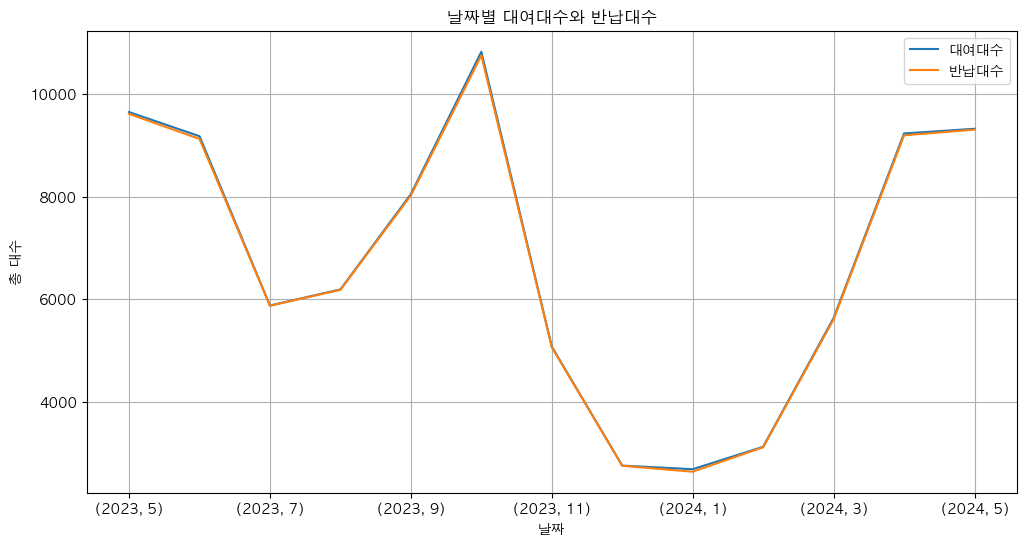

In [250]:
# 날짜별 대여대수와 반납대수
date_group = merged_data.groupby(['연','월'])[['대여대수', '반납대수']].sum()

# 시각화
date_group.plot(kind='line', figsize=(12, 6))
plt.title('날짜별 대여대수와 반납대수')
plt.xlabel('날짜')
plt.ylabel('총 대수')
plt.grid()
plt.show()

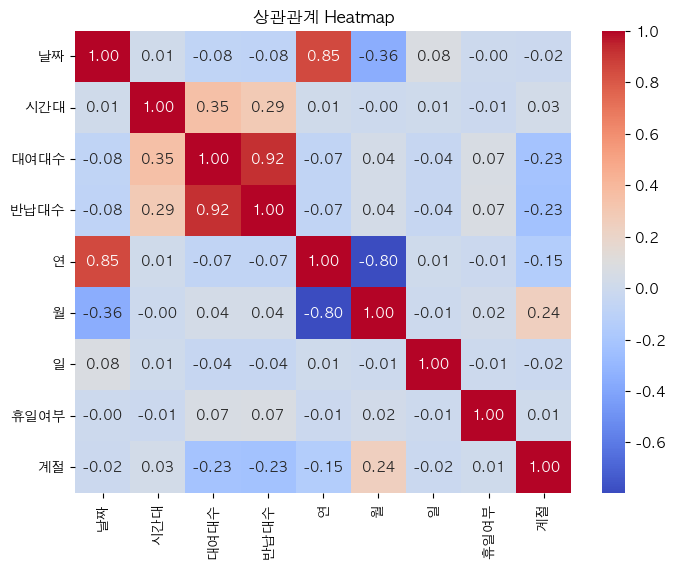

In [251]:
import seaborn as sns

# 상관관계 Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(merged_data.replace({'평일':0, '휴일':1, '봄': 0, '여름': 1, '가을': 2, '겨울' : 3}).drop(columns='대여소').corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('상관관계 Heatmap')
plt.show()

> 시간대는 대여수와 약한 상관관계를 보이지만 다른 컬럼은 상관성이 거의 없다는 것을 알 수 있다.

---
## 날씨 데이터 추가
- main feature를 찾지 못했으므로 날씨에 따른 따릉이 평균 대여대수와 반납대수를 파악해보겠다.

In [252]:
# 데이터 불러오기
weather_data = pd.read_csv("../../data/2305~2405 날씨.csv", encoding='cp949')
weather_data

,지점,지점명,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),전운량(10분위),시정(10m)
0,108,서울,2023-05-01 00:00,12.1,0.0,2.8,87,9,1049
1,108,서울,2023-05-01 01:00,11.6,NaN,2.9,88,6,957
2,108,서울,2023-05-01 02:00,11.0,NaN,2.3,90,6,778
3,108,서울,2023-05-01 03:00,10.8,NaN,1.9,91,8,672
4,108,서울,2023-05-01 04:00,10.4,NaN,2.2,92,8,633
...,...,...,...,...,...,...,...,...,...
9523,108,서울,2024-05-31 19:00,18.7,1.0,2.7,65,8,3671
9524,108,서울,2024-05-31 20:00,18.4,NaN,1.2,68,8,3216
9525,108,서울,2024-05-31 21:00,18.7,NaN,2.5,67,9,3449
9526,108,서울,2024-05-31 22:00,18.8,NaN,2.3,73,10,2528


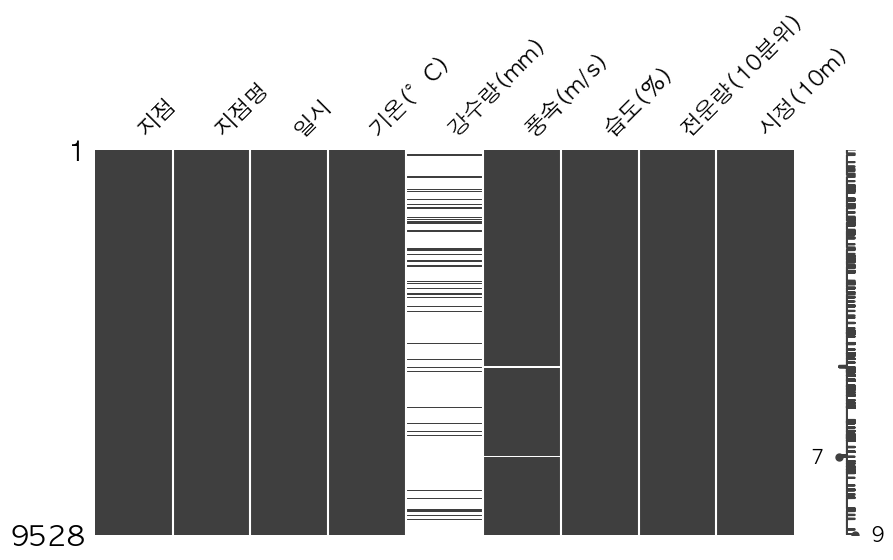

In [253]:
# 결측치 시각화
msno.matrix(weather_data, figsize=(10,5))
plt.show()

In [254]:
# 일시가 Object type이므로 datetime으로 변환
weather_data['일시'] = pd.to_datetime(weather_data['일시'])

# 강수량의 NaN 값을 0으로 채움
weather_data['강수량(mm)'].fillna(0, inplace=True)

# 풍속의 NaN값을 전날 데이터로 채움
weather_data["풍속(m/s)"].fillna(method="ffill", inplace=True)

# 결과 확인
weather_data

,지점,지점명,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),전운량(10분위),시정(10m)
0,108,서울,2023-05-01 00:00:00,12.1,0.0,2.8,87,9,1049
1,108,서울,2023-05-01 01:00:00,11.6,0.0,2.9,88,6,957
2,108,서울,2023-05-01 02:00:00,11.0,0.0,2.3,90,6,778
3,108,서울,2023-05-01 03:00:00,10.8,0.0,1.9,91,8,672
4,108,서울,2023-05-01 04:00:00,10.4,0.0,2.2,92,8,633
...,...,...,...,...,...,...,...,...,...
9523,108,서울,2024-05-31 19:00:00,18.7,1.0,2.7,65,8,3671
9524,108,서울,2024-05-31 20:00:00,18.4,0.0,1.2,68,8,3216
9525,108,서울,2024-05-31 21:00:00,18.7,0.0,2.5,67,9,3449
9526,108,서울,2024-05-31 22:00:00,18.8,0.0,2.3,73,10,2528


In [255]:
# 정보 확인
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9528 entries, 0 to 9527
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   지점         9528 non-null   int64         
 1   지점명        9528 non-null   object        
 2   일시         9528 non-null   datetime64[ns]
 3   기온(°C)     9528 non-null   float64       
 4   강수량(mm)    9528 non-null   float64       
 5   풍속(m/s)    9528 non-null   float64       
 6   습도(%)      9528 non-null   int64         
 7   전운량(10분위)  9528 non-null   int64         
 8   시정(10m)    9528 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 670.1+ KB


> 결측치를 해결한 것을 알 수 있다.

In [256]:
# 연, 월, 일 휴일여부 컬럼 추가
weather_data['연'] = weather_data['일시'].dt.year
weather_data['월'] = weather_data['일시'].dt.month
weather_data['일'] = weather_data['일시'].dt.day
weather_data['휴일여부'] = weather_data['일시'].dt.weekday.apply(lambda x: '휴일' if x >= 5 else '평일')

weather_data

,지점,지점명,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),전운량(10분위),시정(10m),연,월,일,휴일여부
0,108,서울,2023-05-01 00:00:00,12.1,0.0,2.8,87,9,1049,2023,5,1,평일
1,108,서울,2023-05-01 01:00:00,11.6,0.0,2.9,88,6,957,2023,5,1,평일
2,108,서울,2023-05-01 02:00:00,11.0,0.0,2.3,90,6,778,2023,5,1,평일
3,108,서울,2023-05-01 03:00:00,10.8,0.0,1.9,91,8,672,2023,5,1,평일
4,108,서울,2023-05-01 04:00:00,10.4,0.0,2.2,92,8,633,2023,5,1,평일
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9523,108,서울,2024-05-31 19:00:00,18.7,1.0,2.7,65,8,3671,2024,5,31,평일
9524,108,서울,2024-05-31 20:00:00,18.4,0.0,1.2,68,8,3216,2024,5,31,평일
9525,108,서울,2024-05-31 21:00:00,18.7,0.0,2.5,67,9,3449,2024,5,31,평일
9526,108,서울,2024-05-31 22:00:00,18.8,0.0,2.3,73,10,2528,2024,5,31,평일


#### mearged_data 와 weather_data 병합

In [257]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9528 entries, 0 to 9527
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   지점         9528 non-null   int64         
 1   지점명        9528 non-null   object        
 2   일시         9528 non-null   datetime64[ns]
 3   기온(°C)     9528 non-null   float64       
 4   강수량(mm)    9528 non-null   float64       
 5   풍속(m/s)    9528 non-null   float64       
 6   습도(%)      9528 non-null   int64         
 7   전운량(10분위)  9528 non-null   int64         
 8   시정(10m)    9528 non-null   int64         
 9   연          9528 non-null   int32         
 10  월          9528 non-null   int32         
 11  일          9528 non-null   int32         
 12  휴일여부       9528 non-null   object        
dtypes: datetime64[ns](1), float64(3), int32(3), int64(4), object(2)
memory usage: 856.2+ KB


In [258]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8135 entries, 0 to 8134
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   대여소     8135 non-null   object        
 1   날짜      8135 non-null   datetime64[ns]
 2   시간대     8135 non-null   int32         
 3   대여대수    8135 non-null   float64       
 4   반납대수    8135 non-null   float64       
 5   연       8135 non-null   int32         
 6   월       8135 non-null   int32         
 7   일       8135 non-null   int32         
 8   휴일여부    8135 non-null   object        
 9   계절      8135 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(4), object(3)
memory usage: 508.6+ KB


In [259]:
# 원본 데이터와 컬럼 일치 작업

# weather_data의 시간대를 추출하여 새로운 컬럼 추가
weather_data['시간대'] = pd.to_datetime(weather_data['일시']).dt.hour

# weather_data의 날짜를 추출하여 새로운 컬럼 추가
weather_data['날짜'] = pd.to_datetime(weather_data['일시'])

# 병합
olympic_park_station = pd.merge(
    merged_data,
    weather_data[['날짜', '연', '월', '일', '시간대', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '전운량(10분위)', '시정(10m)']],
    on = ['연' ,'월', '일','시간대'],
    how='left'
)

olympic_park_station

,대여소,날짜_x,시간대,대여대수,반납대수,연,월,일,휴일여부,계절,날짜_y,기온(°C),강수량(mm),풍속(m/s),습도(%),전운량(10분위),시정(10m)
0,올림픽공원역 3번출구,2023-05-01,1,1.0,1.0,2023,5,1,평일,봄,2023-05-01 01:00:00,11.6,0.0,2.9,88,6,957
1,올림픽공원역 3번출구,2023-05-01,3,2.0,1.0,2023,5,1,평일,봄,2023-05-01 03:00:00,10.8,0.0,1.9,91,8,672
2,올림픽공원역 3번출구,2023-05-01,5,0.0,2.0,2023,5,1,평일,봄,2023-05-01 05:00:00,10.1,0.0,2.4,91,7,566
3,올림픽공원역 3번출구,2023-05-01,6,5.0,5.0,2023,5,1,평일,봄,2023-05-01 06:00:00,9.9,0.0,2.3,92,7,638
4,올림픽공원역 3번출구,2023-05-01,7,3.0,9.0,2023,5,1,평일,봄,2023-05-01 07:00:00,10.1,0.0,2.0,91,4,864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8130,올림픽공원역 3번출구,2024-05-31,19,45.0,31.0,2024,5,31,평일,봄,2024-05-31 19:00:00,18.7,1.0,2.7,65,8,3671
8131,올림픽공원역 3번출구,2024-05-31,20,27.0,33.0,2024,5,31,평일,봄,2024-05-31 20:00:00,18.4,0.0,1.2,68,8,3216
8132,올림픽공원역 3번출구,2024-05-31,21,32.0,17.0,2024,5,31,평일,봄,2024-05-31 21:00:00,18.7,0.0,2.5,67,9,3449
8133,올림픽공원역 3번출구,2024-05-31,22,12.0,12.0,2024,5,31,평일,봄,2024-05-31 22:00:00,18.8,0.0,2.3,73,10,2528


In [260]:
# 중복 컬럼 제거 및 컬럼 이름 변경

# '날짜_y' 컬럼 제거 
olympic_park_station.drop(columns=['날짜_y'], inplace=True)
# '날짜_x' 컬럼 날짜 컬럼으로 이름 변경
olympic_park_station.rename(columns={'날짜_x': '날짜'}, inplace=True)

In [261]:
olympic_park_station

,대여소,날짜,시간대,대여대수,반납대수,연,월,일,휴일여부,계절,기온(°C),강수량(mm),풍속(m/s),습도(%),전운량(10분위),시정(10m)
0,올림픽공원역 3번출구,2023-05-01,1,1.0,1.0,2023,5,1,평일,봄,11.6,0.0,2.9,88,6,957
1,올림픽공원역 3번출구,2023-05-01,3,2.0,1.0,2023,5,1,평일,봄,10.8,0.0,1.9,91,8,672
2,올림픽공원역 3번출구,2023-05-01,5,0.0,2.0,2023,5,1,평일,봄,10.1,0.0,2.4,91,7,566
3,올림픽공원역 3번출구,2023-05-01,6,5.0,5.0,2023,5,1,평일,봄,9.9,0.0,2.3,92,7,638
4,올림픽공원역 3번출구,2023-05-01,7,3.0,9.0,2023,5,1,평일,봄,10.1,0.0,2.0,91,4,864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8130,올림픽공원역 3번출구,2024-05-31,19,45.0,31.0,2024,5,31,평일,봄,18.7,1.0,2.7,65,8,3671
8131,올림픽공원역 3번출구,2024-05-31,20,27.0,33.0,2024,5,31,평일,봄,18.4,0.0,1.2,68,8,3216
8132,올림픽공원역 3번출구,2024-05-31,21,32.0,17.0,2024,5,31,평일,봄,18.7,0.0,2.5,67,9,3449
8133,올림픽공원역 3번출구,2024-05-31,22,12.0,12.0,2024,5,31,평일,봄,18.8,0.0,2.3,73,10,2528


#### 강수량 분포

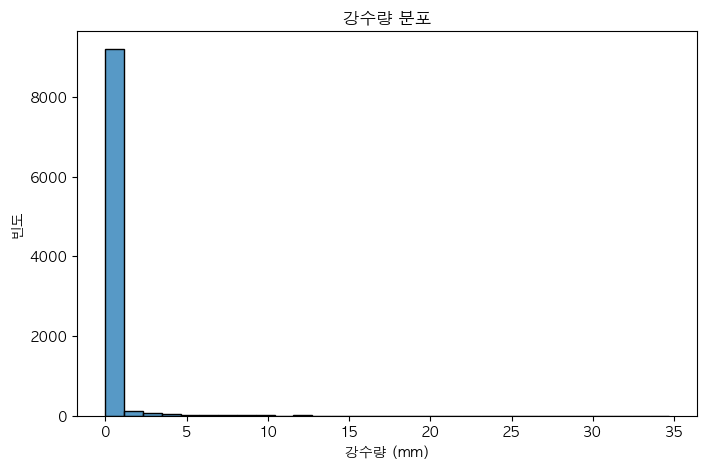

In [262]:
import seaborn as sns
import matplotlib.pyplot as plt

# 강수량 분포 확인
plt.figure(figsize=(8, 5))
sns.histplot(weather_data['강수량(mm)'], bins=30, kde=False)
plt.title('강수량 분포')
plt.xlabel('강수량 (mm)')
plt.ylabel('빈도')
plt.show()

> 비가 안온날이 거의 많은 것을 알 수 있다.

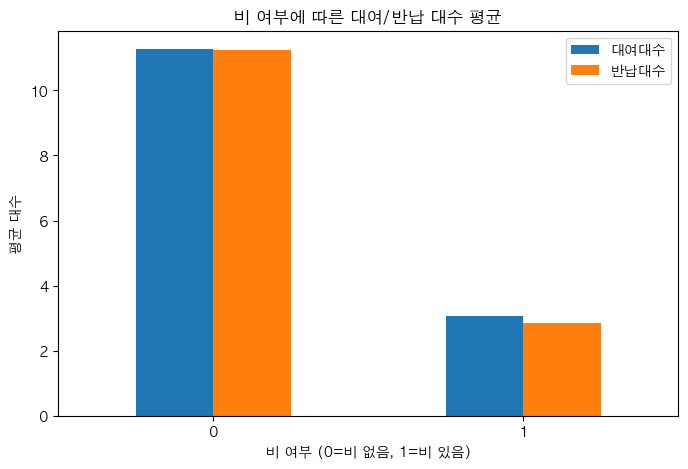

In [263]:
# 강수량 여부 추가
olympic_park_station['강수여부'] = olympic_park_station['강수량(mm)'].apply(lambda x: 1 if x > 0 else 0)

# 비가 온 날과 안 온 날의 대여/반납 대수 평균
rain_effect = olympic_park_station.groupby('강수여부')[['대여대수', '반납대수']].mean()

# 시각화
rain_effect.plot(kind='bar', figsize=(8, 5), rot=0)
plt.title('비 여부에 따른 대여/반납 대수 평균')
plt.xlabel('비 여부 (0=비 없음, 1=비 있음)')
plt.ylabel('평균 대수')
plt.show()

> 비가 없을때 평균 대수가 높은 것을 확인해 볼 수 있다.

#### 날씨를 추가한 상관관계 HeatMap

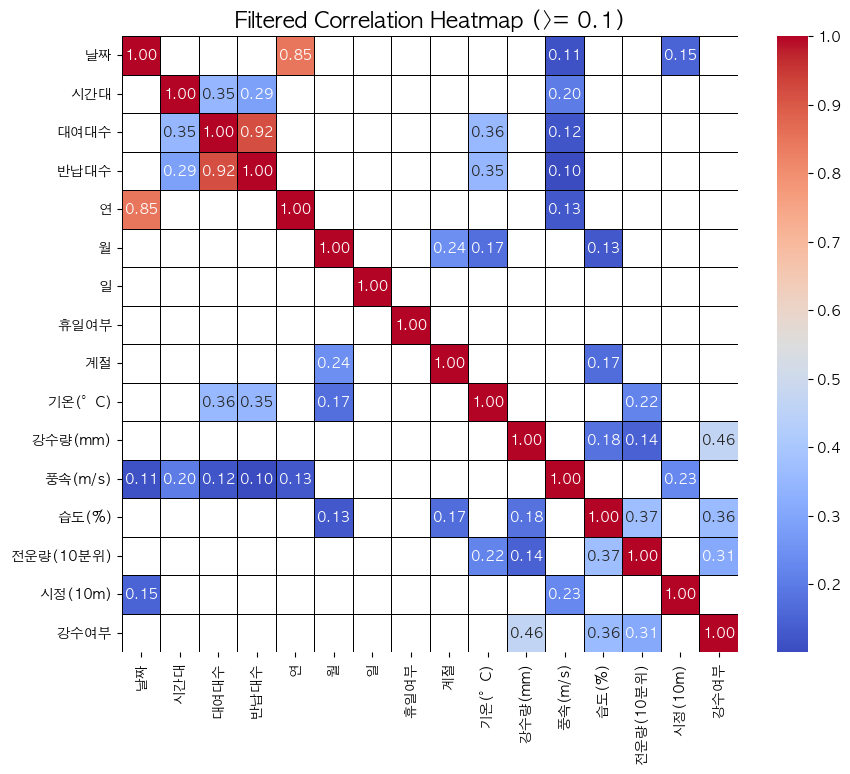

In [264]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 상관계수 계산 및 필터링
correlation_matrix = olympic_park_station.replace(
    {'평일': 0, '휴일': 1, '봄': 0, '여름': 1, '가을': 2, '겨울': 3, '비 없음': 0, '비 있음': 1}
).drop(columns='대여소').corr()
filtered_correlation = correlation_matrix.where(correlation_matrix >= 0.1, np.nan)

# 히트맵 생성
plt.figure(figsize=(10, 8))
sns.heatmap(
    filtered_correlation,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    cbar=True,
    mask=filtered_correlation.isnull(),
    linewidths=0.5,  # 박스 경계선 강조
    linecolor='black',  # 경계선 색상 설정
    square=True  # 정사각형 박스
)
plt.title('Filtered Correlation Heatmap (>= 0.1)', fontsize=16)
plt.show()

> 따릉이는 비가 오는 날에 타지 않을 것으로 예상해서 상관관계가 높을 것으로 예측했지만 현재 오지 않은 날이 nan으로 처리되어      
nan을 0으로 대치했더니 상관관계가 거의 없는 것으로 확인.            
전처리에 대한 적절한 방법인 이진분류로 하였지만 상관관계가 나타나지 않았다.        
이는 추가 분석이 필요해 보임.

#### 상관관계 산점도

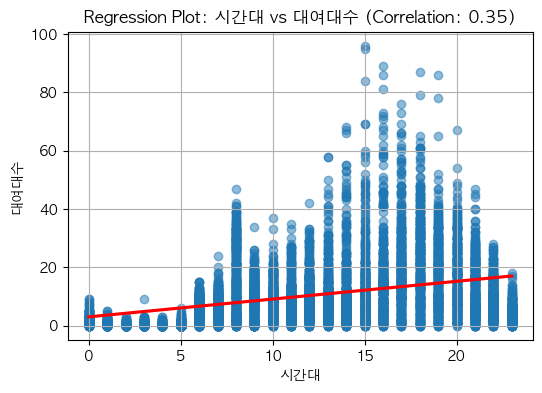

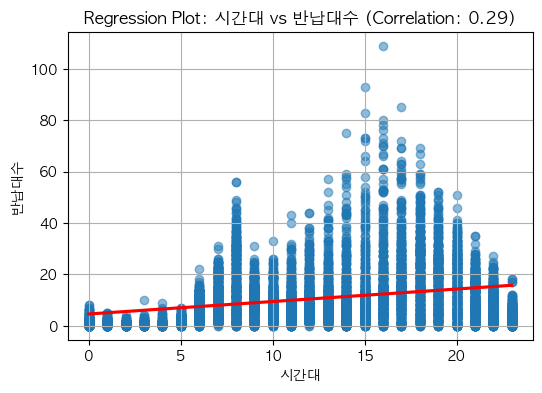

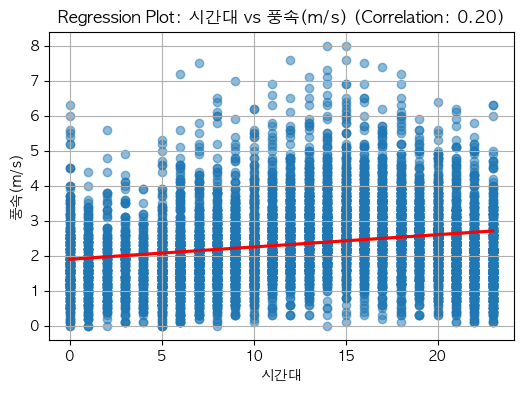

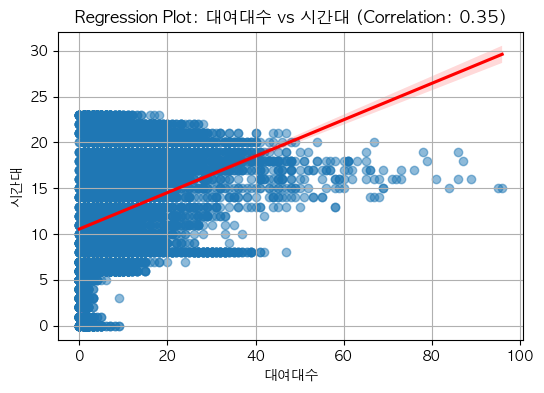

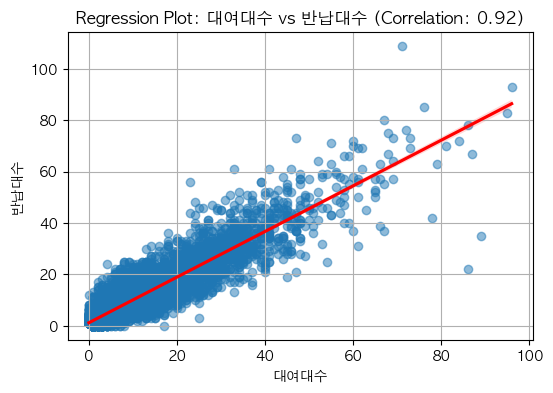

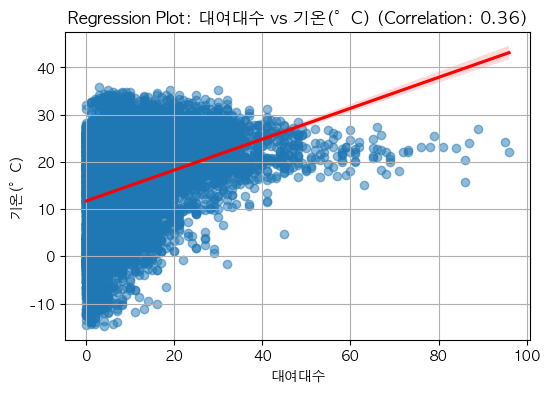

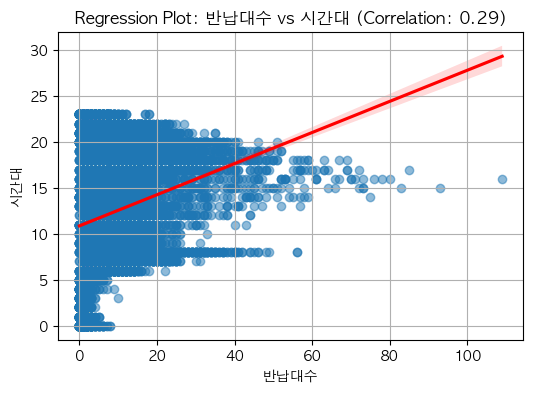

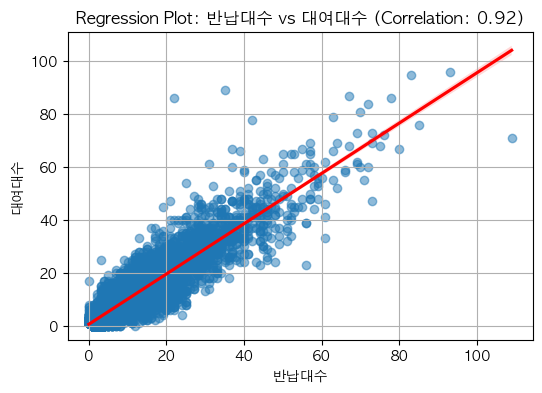

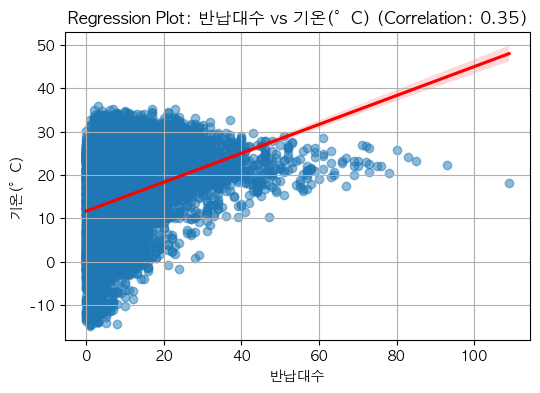

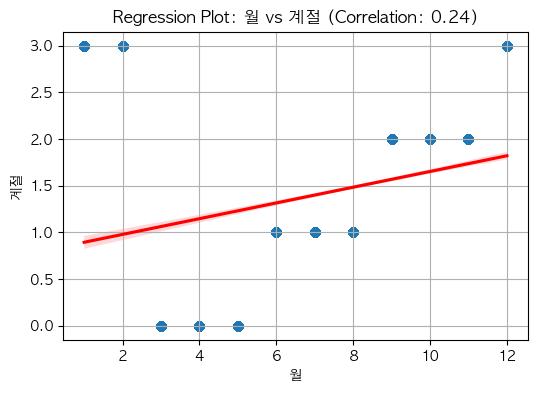

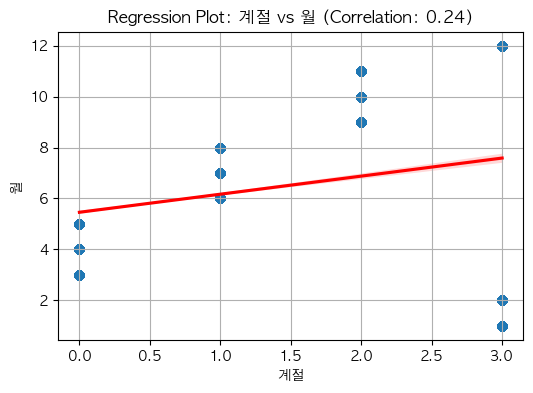

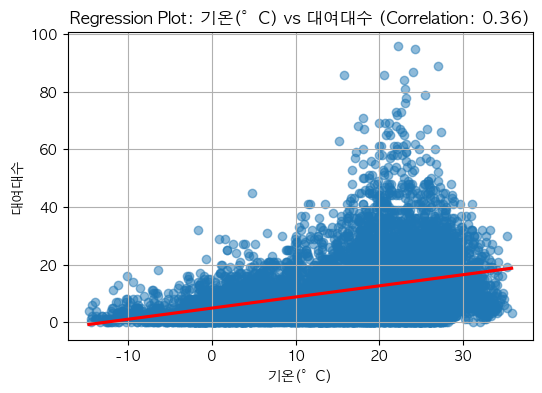

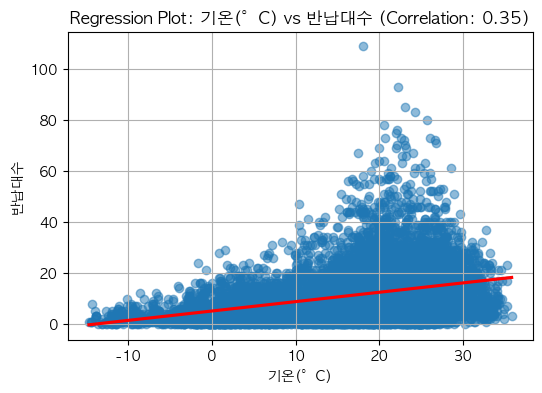

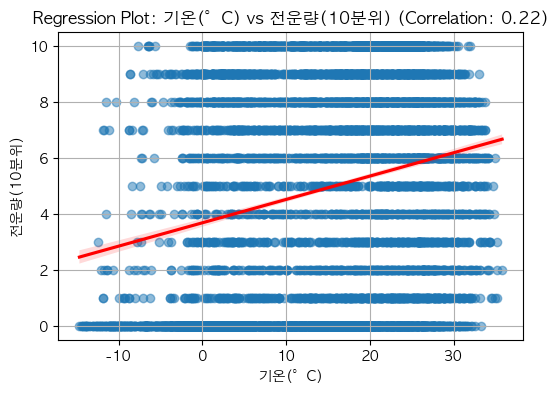

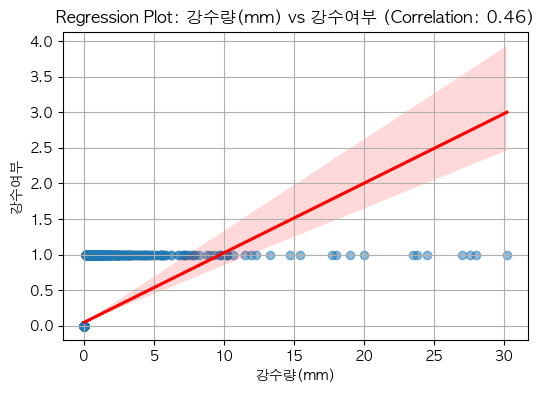

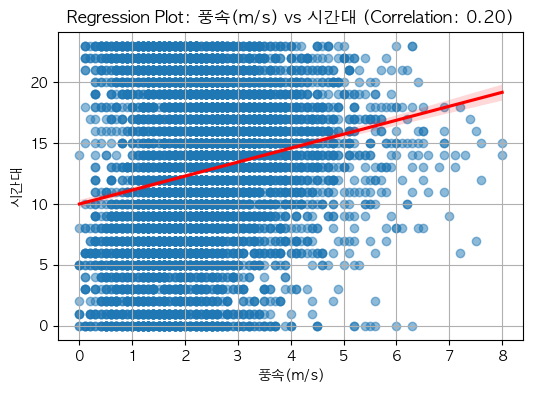

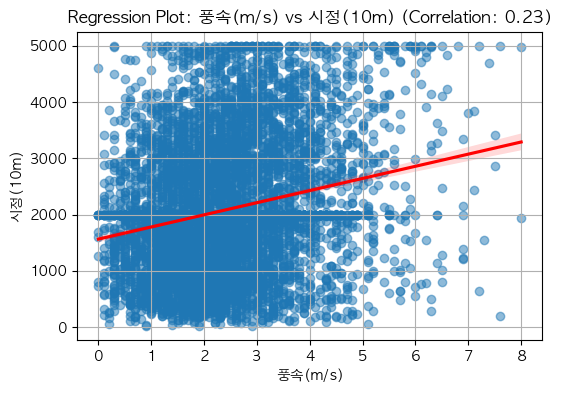

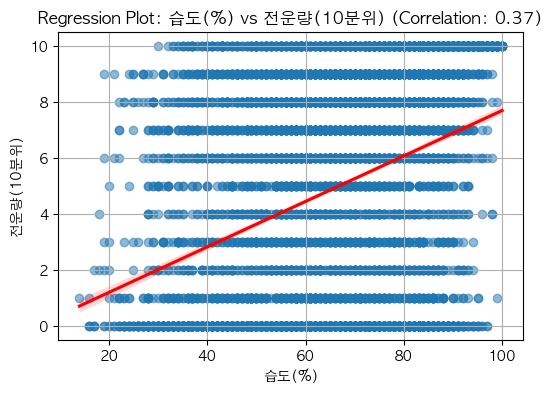

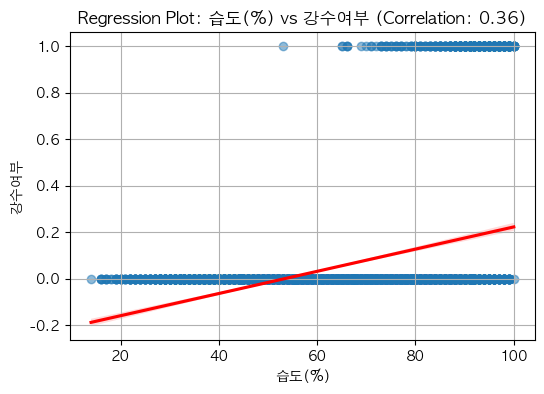

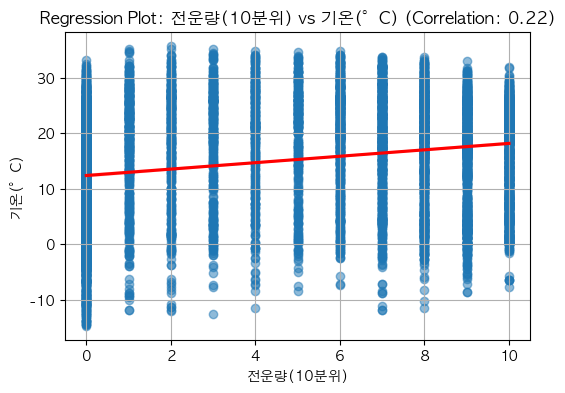

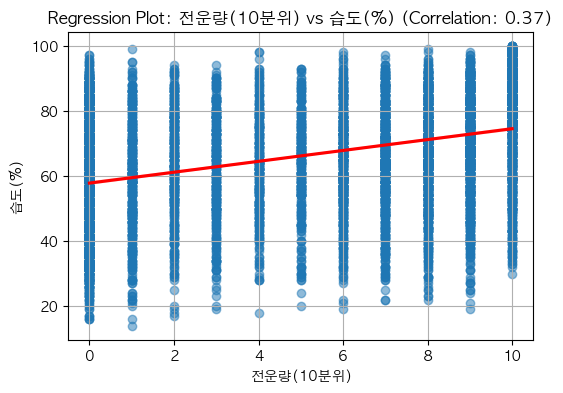

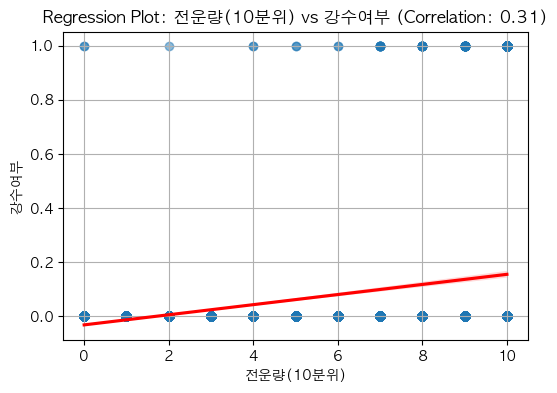

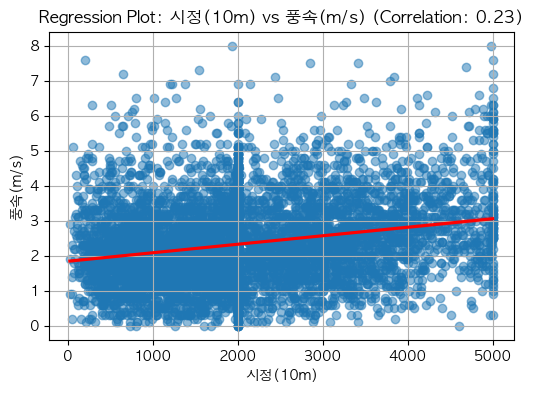

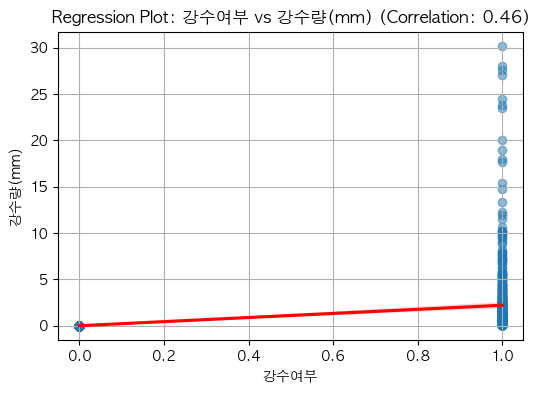

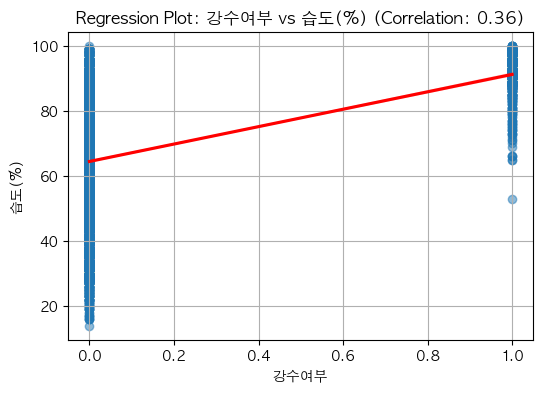

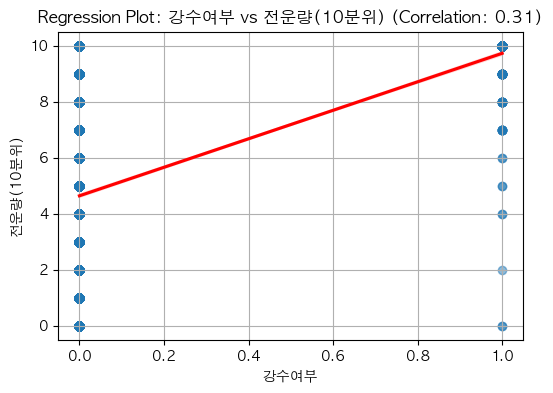

In [265]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 데이터 추출
numeric_data = olympic_park_station.replace(
    {'평일': 0, '휴일': 1, '봄': 0, '여름': 1, '가을': 2, '겨울': 3}
).select_dtypes(include=[np.number])
correlations = numeric_data.corr().stack().reset_index()
correlations.columns = ['Variable1', 'Variable2', 'Correlation']
correlations = correlations[
    (correlations['Correlation'] > 0.2) & (correlations['Variable1'] != correlations['Variable2'])
]

# 산점도 + 회귀선 그리기
for _, row in correlations.iterrows():
    var1 = row['Variable1']
    var2 = row['Variable2']
    
    plt.figure(figsize=(6, 4))
    sns.regplot(
        x=var1, y=var2, data=numeric_data,
        line_kws={"color": "red"}, scatter_kws={"alpha": 0.5}
    )
    plt.title(f'Regression Plot: {var1} vs {var2} (Correlation: {row["Correlation"]:.2f})')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.grid(True)
    plt.show()

#### 날씨 데이터 결론
- 날씨 데이터에서는 기온말고는 전부다 상관관계가 없는 것으로 보임.      
**따라서, 기온을 제외한 컬럼을 제거해주도록 하겠음**

In [268]:
# 컬럼 제거
olympic_park_station.drop(columns=['강수량(mm)','풍속(m/s)', '습도(%)', '전운량(10분위)', '시정(10m)', '강수여부'], inplace=True)

# 데이터 확인
olympic_park_station

,대여소,날짜,시간대,대여대수,반납대수,연,월,일,휴일여부,계절,기온(°C)
0,올림픽공원역 3번출구,2023-05-01,1,1.0,1.0,2023,5,1,평일,봄,11.6
1,올림픽공원역 3번출구,2023-05-01,3,2.0,1.0,2023,5,1,평일,봄,10.8
2,올림픽공원역 3번출구,2023-05-01,5,0.0,2.0,2023,5,1,평일,봄,10.1
3,올림픽공원역 3번출구,2023-05-01,6,5.0,5.0,2023,5,1,평일,봄,9.9
4,올림픽공원역 3번출구,2023-05-01,7,3.0,9.0,2023,5,1,평일,봄,10.1
...,...,...,...,...,...,...,...,...,...,...,...
8130,올림픽공원역 3번출구,2024-05-31,19,45.0,31.0,2024,5,31,평일,봄,18.7
8131,올림픽공원역 3번출구,2024-05-31,20,27.0,33.0,2024,5,31,평일,봄,18.4
8132,올림픽공원역 3번출구,2024-05-31,21,32.0,17.0,2024,5,31,평일,봄,18.7
8133,올림픽공원역 3번출구,2024-05-31,22,12.0,12.0,2024,5,31,평일,봄,18.8


In [269]:
# 데이터 저장
olympic_park_station.to_csv("../../data/olympic_park_station_weather_merge.csv")